**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
import exam_prob2 as prob2

In [7]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


We have setup the function for this task in out .py file (exam_prob2.py) where we have calculated the expected utility and the average realised utility. We set the seed to 2024 such that the results don't change each time we run the code.

In [8]:
# Set seed for reproducibility 
set_seed = 2024
np.random.seed(set_seed)

# Run the simulation
expected_u, avg_realized_u = prob2.simulate_q1(par)

Career choice 1:
  Expected Utility: 1.0
  Average Realized Utility: 1.0195425157484137
Career choice 2:
  Expected Utility: 2.0
  Average Realized Utility: 1.9923750890955787
Career choice 3:
  Expected Utility: 3.0
  Average Realized Utility: 3.012821544049908


As we know, the expected utility is derived from the theoretical expectation above. We also know, that the ϵ values are derived from a normal distribution with mean 0, which means that the expected value of ϵ is 0. Thus, for a large number of draws K as in this scenario (10000), the expected value of the sum of ϵ values divided by will approach 0. The expected utility formula will therefore be reduced to:
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j 
$$
This is why we get that the expected utility is equal to $ v_j $.


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We have to illustrate 3 different things in this task:

* Shares of Career Choice for Graduates
* Average Expected Utility for Graduates
* Average Realized Utility for Graduates

This has been done in the code below:

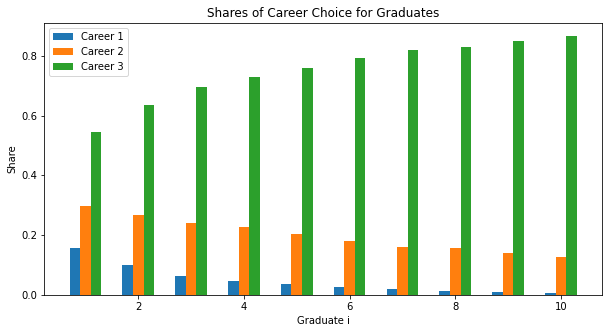

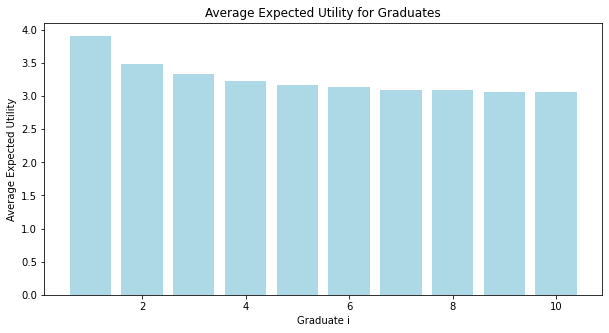

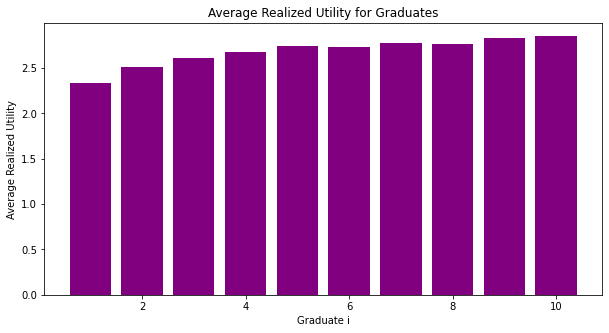

In [9]:
# We start by using the same seed as previously
set_seed = 2024
np.random.seed(set_seed)

# We initialize containers to store results
career = np.zeros((par.N, par.K), dtype=int)
prior_expect = np.zeros((par.N, par.K))
realized_u = np.zeros((par.N, par.K))

career_shares = np.zeros((par.N, par.J))
avg_prior_expect = np.zeros(par.N)
avg_realized_u = np.zeros(par.N)

# We then simulate the process for K draws and N friends
for k in range(par.K):
    for i in range(par.N):
        F_i = i + 1
        
        # We draw the epsilon values for each friend and for the graduate him-/her-self
        epsilon_F = np.random.normal(0, par.sigma, (F_i, par.J))
        epsilon_grad = np.random.normal(0, par.sigma, par.J)
        
        # We then calculate the graduates expected utility for each career track
        expected_u = par.v + np.mean(epsilon_F, axis=0)
                
        # We choose the career track with the highest expected utility
        j_star = np.argmax(expected_u)
        
        # Finally we store the results in the containers
        career[i, k] = j_star
        prior_expect[i, k] = expected_u[j_star]
        realized_u[i, k] = par.v[j_star] + epsilon_grad[j_star]

# We calculate shares of graduates choosing each career track and the average expectations and realized utilities
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.sum(career[i, :] == j) / par.K  # Calculate share directly
    avg_prior_expect[i] = np.sum(prior_expect[i, :]) / par.K  # Calculate average prior expectation
    avg_realized_u[i] = np.sum(realized_u[i, :]) / par.K

# We set up x for the Friends for plotting
x = np.arange(1, par.N + 1)

# We plot share of graduates choosing each career
plt.figure(figsize=(10, 5))
for j in range(par.J):
    plt.bar(x + (j-1)*0.2, career_shares[:, j], width=0.2, label=f'Career {j+1}')
plt.xlabel('Graduate i')
plt.ylabel('Share')
plt.title('Shares of Career Choice for Graduates')
plt.legend()
plt.show()

# We plot the avg expected utility for graduates
plt.figure(figsize=(10, 5))
plt.bar(x, avg_prior_expect, color='lightblue')
plt.xlabel('Graduate i')
plt.ylabel('Average Expected Utility')
plt.title('Average Expected Utility for Graduates')
plt.show()

# We plot the avg realized utility for graduates
plt.figure(figsize=(10, 5))
plt.bar(x, avg_realized_u, color='purple')
plt.xlabel('Graduate i')
plt.ylabel('Average Realized Utility')
plt.title('Average Realized Utility for Graduates')
plt.show()

#### Shares of career choice for graduates 
The share of the different career choises for the graduates is illustrated in the first plot. The formulation of the question sates that there are 10 different types of graduates where gratuate type 1 only has 1 friend that work in each of the careers, the second has 2 friends in each and so on. This means that graduates of type 1 limited amount of information in each of the career choises while graduates of type 10 has 10 sources in each career choises which is the most. All else equal, more information leads to better decisionmaking. This results in grauates of type 1 are more likely to choose career 1 or 2, where the utility is smaller compared to career 3. On the other hand, graduates of type 10 are more likely to choose career 3 where the utility are the highest beacuse of all the information he gets from his friends that work in the 3 different career choises points towards the utility is higher in career 3. Overall, this means that as the number of freinds increase for the graduates they are more likely to choose career choise 3. This results in the number of graduates chooesing a different career path other than career 3 becomes smaller.

#### Average expected utility for graduates
The average of the expected utility is displayed in the secound plot above. It shows that the graduates with the most friends (graduates of type 5-10) are around a value of 3 in expected utility. This indicates that the information possessed by these types of graduates converges towards the actual utility value of career 3. This means that they are also more likely to anticipate the utility they will get from their career choise. 

#### Average realized utility for graduates
The realized utility is smaller for the types of graduates with less friends compared to the other types who have more. This is due to the fact that more of the e.g. type 1 graduates chooses a career in 1 or 2 which yield a lower realized utility than a career in 3 does. 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

To solve this problem we have to follow the same approach as in question 2 and illustrate the same 3 aspects as before:

* Shares of career choice for graduates
* Average expected utility for graduates
* Average realized utility for graduates

Now we also have to include:

* Share of graduates that chooses to switch careers

The code that solves this problem can be found below:

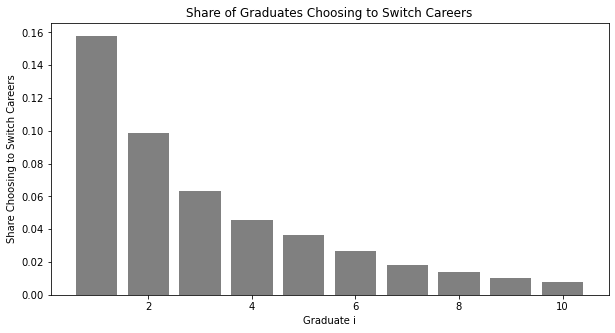

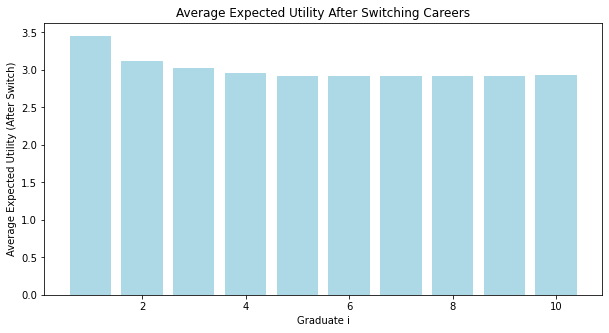

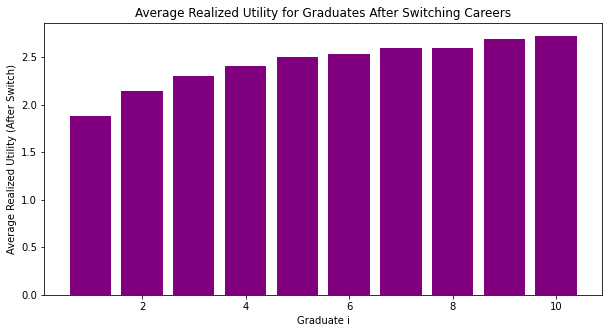

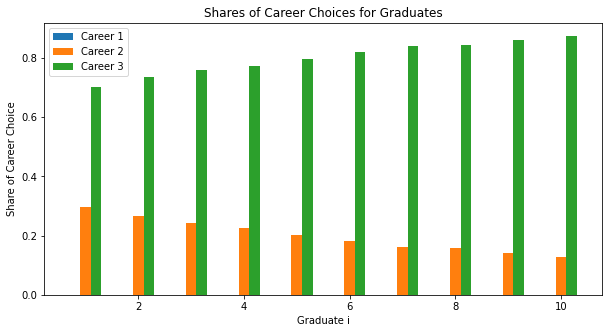

In [10]:
# We initialize containers to store results
career = np.zeros((par.N, par.K), dtype=int)
prior_expect = np.zeros((par.N, par.K))
realized_u = np.zeros((par.N, par.K))

avg_prior_expect = np.zeros(par.N)
avg_realized_u = np.zeros(par.N)

# We then simulate the process for K draws and N friends
np.random.seed(set_seed)
for k in range(par.K):
    for i in range(par.N): # We retrieve the initial career choice and the realized utility along with that
        F_i = i + 1
        
        # Draw the epsilon values for each friend and for the graduate him-/her-self
        epsilon_F = np.random.normal(0, par.sigma, (F_i, par.J))
        epsilon_grad = np.random.normal(0, par.sigma, par.J)
        
        # Derive the expected utility for each career track
        expected_u = par.v + np.mean(epsilon_F, axis=0)
                
        # Choosing the career choise with the highest expected utility
        j_star = np.argmax(expected_u)
        
        # Store the results in the containers
        career[i, k] = j_star
        prior_expect[i, k] = expected_u[j_star]
        realized_u[i, k] = par.v[j_star] + epsilon_grad[j_star]

# Initialize containers for the second year where they work
career_switch = np.zeros((par.N, par.K), dtype=int)
prior_expect_switch = np.zeros((par.N, par.K))
realized_u_switch = np.zeros((par.N, par.K))
switch = np.zeros((par.N, par.K), dtype=bool)

# Simulating the second year with potential career switching
for k in range(par.K):
    for i in range(par.N):
        j_star_init = career[i, k]
        u_init = realized_u[i, k]

        # Calculate expected and realized utility for each career choise
        expected_u = np.zeros(par.J)
        realized_u_options = np.zeros(par.J)
        for j in range(par.J):
            if j != j_star_init:
                prior_expect_u = prior_expect[i, k] - par.c
                u_switch = u_init - par.c
            else:
                prior_expect_u = prior_expect[i, k]
                u_switch = u_init

            expected_u[j] = prior_expect_u + par.v[j]
            realized_u_options[j] = u_switch

        # Determine the new optimal career choice
        optimal_j = np.argmax(expected_u)
        switch[i, k] = (optimal_j != j_star_init)
        career_switch[i, k] = optimal_j
        prior_expect_switch[i, k] = expected_u[optimal_j]
        realized_u_switch[i, k] = realized_u_options[optimal_j]

# Derives the averages and shares
avg_prior_expect_switch = np.mean(prior_expect_switch, axis=1)
avg_realized_u_switch = np.mean(realized_u_switch, axis=1)
switch_shares = np.mean(switch, axis=1)

# Derives  the shares of career choices
career_counts = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_counts[i, j] = np.sum(career_switch[i] == j)

career_shares = career_counts / par.K

# Set up x for the graduates for plotting
x = np.arange(1, par.N + 1)

# (re)asuring the same seed as previously
np.random.seed(set_seed)

# Reinitialize containers to store results
career_switch = np.zeros((par.N, par.K), dtype=int)
prior_expect_switch = np.zeros((par.N, par.K))
realized_u_switch = np.zeros((par.N, par.K))
switch = np.zeros((par.N, par.K), dtype=bool)

# Simulate the process for K draws and N friends
for k in range(par.K):
    for i in range(par.N):
        j_star_init = career[i, k]
        u_init = realized_u[i, k]
        
        for j in range(par.J):
            if j != j_star_init:
                prior_expect_u = prior_expect[i, k] - par.c
            else:
                prior_expect_u = prior_expect[i, k]
            
            if j == j_star_init:
                u_switch = u_init
            else:
                u_switch = realized_u[i, k] - par.c
            
            prior_expect_switch[i, k] = prior_expect_u
            realized_u_switch[i, k] = u_switch
            
            if prior_expect_u + par.v[j] > prior_expect[i, k] + par.v[j_star_init]:
                switch[i, k] = True
                career_switch[i, k] = j
                prior_expect[i, k] = prior_expect_u
                realized_u[i, k] = u_switch
                career[i, k] = j

# Derives the averages after the potential switch
avg_prior_expect_switch = np.sum(prior_expect_switch, axis=1) / par.K
avg_realized_u_switch = np.sum(realized_u_switch, axis=1) / par.K
switch_shares = np.sum(switch, axis=1) / par.K

# We set up x for the graduates for plotting
x = np.arange(1, par.N + 1)

# Plot the Share of graduates choosing to switch careers
plt.figure(figsize=(10, 5))
plt.bar(x, switch_shares, color='grey')
plt.xlabel('Graduate i')
plt.ylabel('Share Choosing to Switch Careers')
plt.title('Share of Graduates Choosing to Switch Careers')
plt.show()

# We plot avg expected utility after a potential switch
plt.figure(figsize=(10, 5))
plt.bar(x, avg_prior_expect_switch, color='lightblue')
plt.xlabel('Graduate i')
plt.ylabel('Average Expected Utility (After Switch)')
plt.title('Average Expected Utility After Switching Careers')
plt.show()

# We plot avg realized utility after a potential switch
plt.figure(figsize=(10, 5))
plt.bar(x, avg_realized_u_switch, color='purple')
plt.xlabel('Graduate i')
plt.ylabel('Average Realized Utility (After Switch)')
plt.title('Average Realized Utility for Graduates After Switching Careers')
plt.show()

# We plot the shares of career choices for graduates
plt.figure(figsize=(10, 5))
for j in range(par.J):
    plt.bar(x + (j-1)*0.2, career_shares[:, j], width=0.2, label=f'Career {j+1}')
plt.xlabel('Graduate i')
plt.ylabel('Share of Career Choice')
plt.title('Shares of Career Choices for Graduates')
plt.legend()
plt.show()


#### Share of graduates that chooses to switch careers
As the first plot illustrates, almost 16% of type 1 graduates chooses to swith careers where under 2% of type 10 graduates swithes. The reason for this is that type 10 graduates are more likely to choose the right career path initially since they have more information about the different types of careers compared to type 1 graduates. This demonstrates that when the graduates have increased information it leads to better initial career choices and fewer career switches in this particular case.

#### Average expected utility after switching careers
In the secound plot the illustration of the average expected utility after switching are displayed. This shows that the graduates of type 1 expect that the "grass is greener on the other side" which is why there expectation is high. However, they know that the switch come with a cost so the expected utility is slightly smaller than before when they still havn't chosesen their career path yet. 

#### Average realized utility for graduates after switching careers
The realized utility is smaller than before in Q2 even after making the career switch. This is due to cost of switching careers and some of them might even choose a career 1 or 2 that doesn't yeild the highest possible utility.

#### Conclusion
From the 1. plot in this question 3 "Share of Graduates Choosing to Switch Careers" and the 1. plot in question 2 "Shares of Career Choice for Graduates" we see that all the graduates that choose career 1 are now swichting careers. In plot 4 "Shares of Career Choices for Graduates" we see that there are on longer any graduates that chooses career 1. Anoghter thing we notice is that all of the graduates that switches, switch to career 3. You can see that by examining the bars for career 2 and 3 - career 3 is the only one that increases in where career 2 is at a hold. This makes sence since the cost of switching is c=1 and therefore it will not make sence to switch if the graduates don't choose the career where v=3. 

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [11]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [12]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [13]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [14]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [15]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [16]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [17]:
# write your answer here